In [1]:
from timbr import Snapshot
%reload_ext timbr.notebook
%timbr SnapshotSelector

<IPython.core.display.Javascript object>

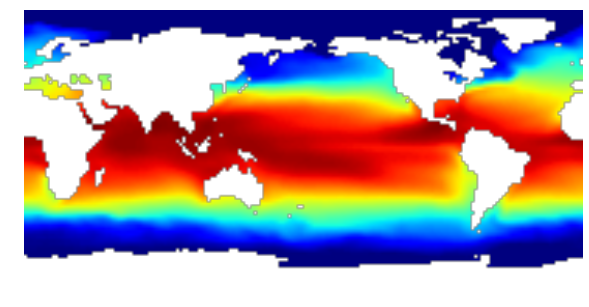

In [8]:
%matplotlib inline
import base64
import numpy as np
import matplotlib.pyplot as plt

ids, rows = zip(*data)

idx = 0
xlen = 180
ylen = 89
months = 12

full_arr = np.empty((len(rows)*months, ylen, xlen))

for i, row in enumerate(rows):
    ascii = [map(int, r.split()) for r in base64.b64decode(row['data']['__data__']).split('\n')]  
    for p in xrange(0, len(ascii)-xlen, xlen):
        mon = ascii[ p:p + xlen ]
        narr = np.empty((ylen, xlen))
        for x, lons in enumerate(mon):
            for y, val in enumerate(reversed(lons)):
                narr[y, x] = val / 100.0
          
        full_arr[idx] = narr
        idx += 1
    
full_arr = np.ma.masked_array(full_arr, full_arr == -99.99)

def plot_month(month):
    fig = plt.figure()
    fig.set_size_inches(10, 5)
    ax = plt.gca()
    ax.axis('off')
    month_arr = full_arr[month,:,:]
    ax.imshow(month_arr, cmap='jet')
    plt.show()
    
plot_month(1000)

In [22]:
print full_arr.shape

(1932, 89, 180)


In [12]:
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy
from IPython.display import HTML, clear_output

fps = 8
duration = full_arr.shape[0]/fps

fig, ax = plt.subplots(1,figsize=(5,3), facecolor='white')
ax.axis('off')

img = ax.imshow(full_arr[0,:,:], cmap='jet')

clear_output()

indexes = list(np.arange(0, (len(rows)*months)/4, float(1)/fps))

def make_frame(t):
    month_arr = full_arr[indexes.index(t),:,:]
    img.set_data(month_arr)
    return mplfig_to_npimage(fig)


animation = mpy.VideoClip(make_frame, duration=duration)
animation.write_gif("sst.gif", fps=fps)
plt.show()
clear_output()

HTML('<img src="./sst.gif">')

In [10]:
HTML('<img src="test.gif">')

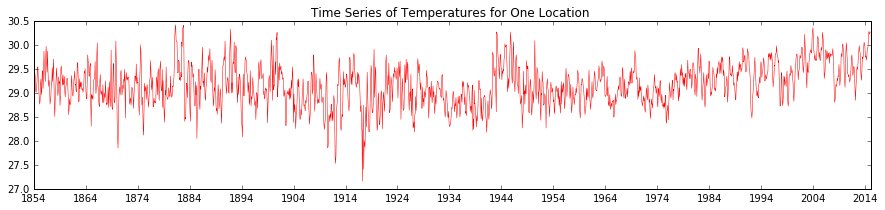

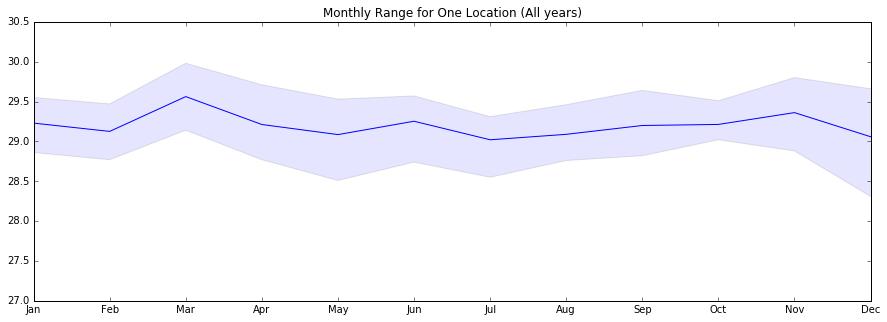

In [88]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

def plot_xy(x, y, arr, years, width=15, height=3):
    
    # plot the full timeseries
    fig = plt.figure()
    fig.set_size_inches(width, height)
    ax = fig.add_subplot(111)
    ax.set_xlim([0,len(arr)])
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start, end, 120))
    labels = xrange(years[0], years[-1]+1, 10)
    ax.set_xticklabels(labels)
    
    ax.plot( arr, "r-", lw=0.5)
    plt.title('Time Series of Temperatures for One Location ')
    plt.show()

    # plot month range
    fig = plt.figure()
    fig.set_size_inches(15, 5)
    ax = fig.add_subplot(111)
    ax.set_xlim([0,11])
    plt.locator_params(axis='x',nbins=len(month_labels))
    ax.set_xticklabels(month_labels)
    months = arr.reshape(161,12)
    ax.plot(months.mean(axis=1), "b-")
    ax.fill_between(np.array(range(161)), months.min(axis=1), months.max(axis=1), alpha=.1)
    plt.title('Monthly Range for One Location (All years)')
    plt.show()
    
    
# Extract Rows from the Snapshot
ids, rows = zip(*data)

# Process Each month for each year into an ndarray
idx = 0
xlen = 180
ylen = 89
full_arr = np.empty((len(rows)*12, ylen, xlen))
for i, row in enumerate(rows):
    ascii = [map(int, r.split()) for r in base64.b64decode(row['data']['__data__']).split('\n')]  
    for p in xrange(0, len(ascii)-xlen, xlen):
        mon = np.array(ascii[ p:p + xlen ])
        full_arr[idx] = mon.transpose() / 100.0
        idx += 1

# Ignore -99.99 as No-Data
full_arr = np.ma.masked_array(full_arr, full_arr == -99.99)

# Extract all years
years = years = [row['year'] for row in rows]

    
x = 80
y = 45   
plot_xy(x, y, full_arr[:,y,x], years)

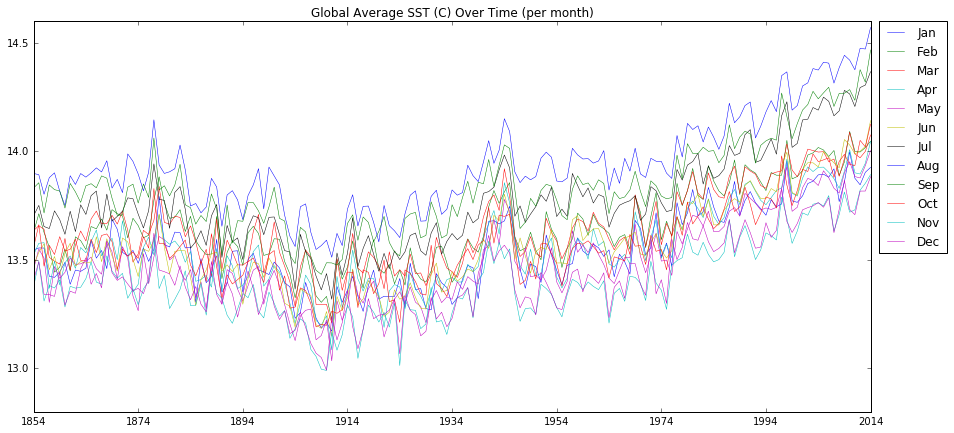

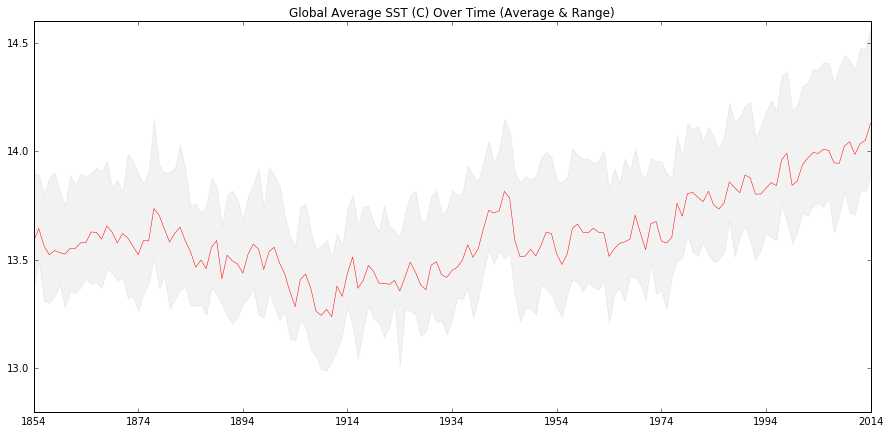

In [53]:
%matplotlib inline
import base64
import numpy as np
import matplotlib.pyplot as plt

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

def plot_monthly_means(arr, years):
    """ Plots the global average for each month for each year"""
    month_arr = np.nanmean( arr.reshape(len(years),12,89,180), axis=(2,3)).transpose()

    fig = plt.figure()
    fig.set_size_inches(15,7)
    ax = fig.add_subplot(111)

    labels = xrange(years[0], years[-1]+1, 20)
    ax.set_xticklabels(labels)

    for i in range(12):
        plt.plot(month_arr[i], lw=.5, label=months[i])
    plt.title('Global Average SST (C) Over Time (per month)')
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.show()
    
    
def plot_global_range(arr, years):
    """ Plots the min, max and average for every month for each year"""
    month_arr = np.nanmean( arr.reshape(len(years),12,89,180), axis=(2,3)).transpose()

    fig = plt.figure()
    fig.set_size_inches(15,7)
    ax = fig.add_subplot(111)
    
    labels = xrange(years[0], years[-1]+1, 20)
    ax.set_xticklabels(labels)
    
    plt.plot(np.mean(month_arr, axis=0), 'r', lw=.5)
    plt.fill_between(range(len(years)), month_arr.min(axis=0), month_arr.max(axis=0), color="black", alpha=.05)
    plt.title('Global Average SST (C) Over Time (Average & Range)')
    plt.show()
    
    
# Extract Rows from the Snapshot
ids, rows = zip(*data)

# Process Each month for each year into an ndarray
idx = 0
xlen = 180
ylen = 89
full_arr = np.empty((len(rows)*12, ylen, xlen))
for i, row in enumerate(rows):
    ascii = [map(int, r.split()) for r in base64.b64decode(row['data']['__data__']).split('\n')]  
    for p in xrange(0, len(ascii)-xlen, xlen):
        mon = np.array(ascii[ p:p + xlen ])
        full_arr[idx] = mon.transpose() / 100.0
        idx += 1

# Ignore -99.99 as No-Data
full_arr = np.ma.masked_array(full_arr, full_arr == -99.99)

# Extract all years
years = years = [row['year'] for row in rows]

# Render Plots
plot_monthly_means( full_arr, years )
plot_global_range( full_arr, years )

In [46]:
ids, rows = zip(*data)
idx = 0
xlen = 180
ylen = 89
months = 12

full_arr = np.ndarray((len(rows)*months, ylen, xlen)) #empty((len(rows)*months, ylen, xlen))
cnt = 0
for i, row in enumerate(rows[0:2]):
    ascii = [map(int, r.split()) for r in base64.b64decode(row['data']['__data__']).split('\n')]
    for p in xrange(0, len(ascii)-xlen, xlen):
        mon = np.array(ascii[ p:p + xlen ])
        full_arr.put(idx, mon.transpose())
        idx += 1
        
    cnt += 1
    #a = base64.b64decode(row['data']['__data__']).split('\n')
    #b = np.array(ascii[0:180])
    #b = b.reshape(89,180)
    #full_arr[0] = b
    
print 'done', full_arr

done [[[-9999. -9999. -9999. ...,     0.     0.     0.]
  [    0.     0.     0. ...,     0.     0.     0.]
  [    0.     0.     0. ...,     0.     0.     0.]
  ..., 
  [    0.     0.     0. ...,     0.     0.     0.]
  [    0.     0.     0. ...,     0.     0.     0.]
  [    0.     0.     0. ...,     0.     0.     0.]]

 [[    0.     0.     0. ...,     0.     0.     0.]
  [    0.     0.     0. ...,     0.     0.     0.]
  [    0.     0.     0. ...,     0.     0.     0.]
  ..., 
  [    0.     0.     0. ...,     0.     0.     0.]
  [    0.     0.     0. ...,     0.     0.     0.]
  [    0.     0.     0. ...,     0.     0.     0.]]

 [[    0.     0.     0. ...,     0.     0.     0.]
  [    0.     0.     0. ...,     0.     0.     0.]
  [    0.     0.     0. ...,     0.     0.     0.]
  ..., 
  [    0.     0.     0. ...,     0.     0.     0.]
  [    0.     0.     0. ...,     0.     0.     0.]
  [    0.     0.     0. ...,     0.     0.     0.]]

 ..., 
 [[    0.     0.     0. ...,     0.     

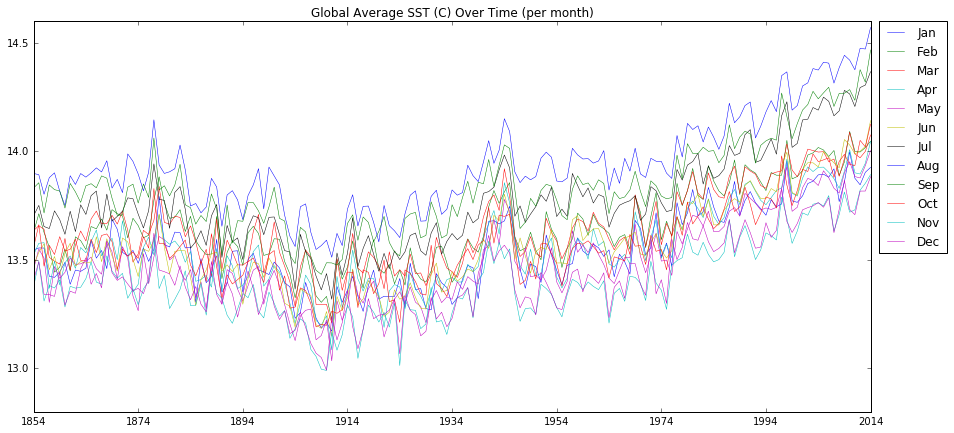

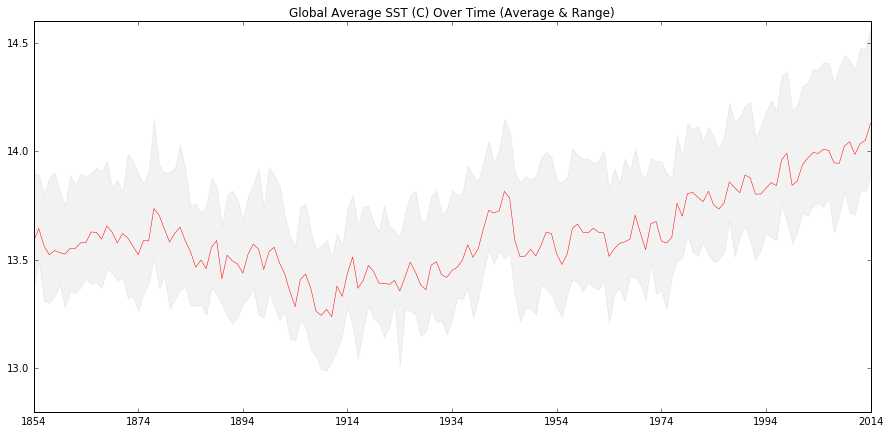

In [125]:
fig = plt.figure()
fig.set_size_inches(15,7)
ax = fig.add_subplot(111)
labels = xrange(years[0], years[-1]+1, 20)
ax.set_xticklabels(labels)
plt.plot(np.mean(month_arr, axis=0), 'r', lw=.5)
plt.fill_between(range(len(years)), month_arr.min(axis=0), month_arr.max(axis=0), color="black", alpha=.05)
plt.title('Global Average SST (C) Over Time (Average & Range)')
plt.show()
    

(161,)
(161,)
(161,)


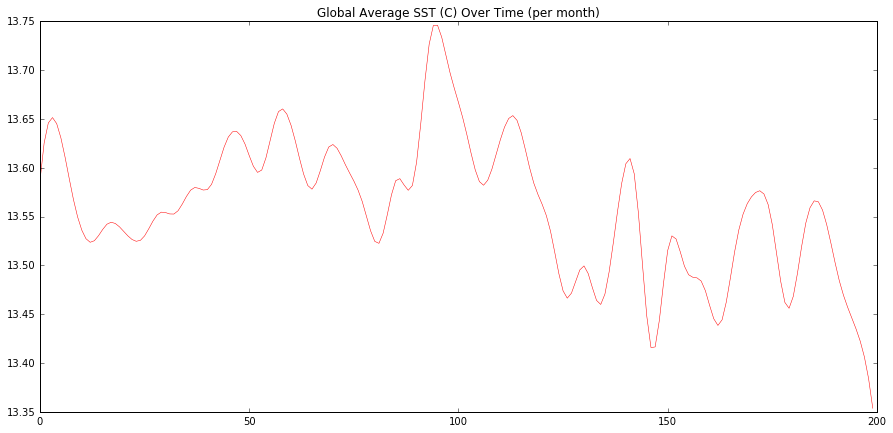

In [132]:
from scipy.interpolate import spline
def smooth(x, y):
    x_sm = np.array(x)
    y_sm = np.array(y)
    x_smooth = np.linspace(x_sm.min(), x_sm.max(), 200)
    y_smooth = spline(x, y, x_smooth)
    return x_smooth, y_smooth

years = [row['year'] for row in rows]

arr = np.nanmean( full_arr.reshape(161,12,89,180), axis=(2,3))

print np.nanmean( arr, axis=1).shape
print np.nanmin( arr, axis=1).shape
print np.nanmax( arr, axis=1).shape

fig = plt.figure()
fig.set_size_inches(15,7)
ax = fig.add_subplot(111)

labels = xrange(years[0], years[-1]+1, 20)
#ax.set_xticklabels(labels)

x, line = smooth(range(len(years[0:50])), np.mean(arr[0:50], axis=1))
plt.plot(line, 'r', lw=.5)
#plt.fill_between(range(len(years)), arr.min(axis=1), arr.max(axis=1), color="black", alpha=.05)

plt.title('Global Average SST (C) Over Time (per month)')
plt.show()


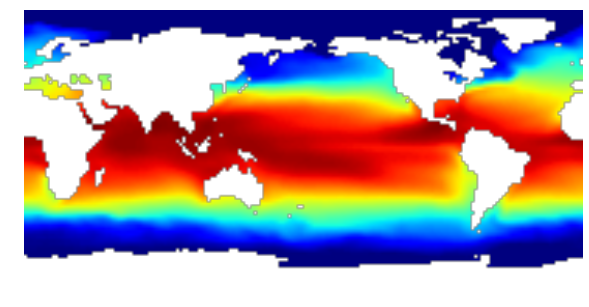

In [49]:
%matplotlib inline
import base64
import numpy as np
import matplotlib.pyplot as plt

ids, rows = zip(*data)

full_arr = np.empty((len(rows)*months, ylen, xlen))

idx = 0
xlen = 180
ylen = 89
months = 12

for i, row in enumerate(rows):
    ascii = [map(int, r.split()) for r in base64.b64decode(row['data']['__data__']).split('\n')]  
    for p in xrange(0, len(ascii)-xlen, xlen):
        mon = ascii[ p:p + xlen ]
        narr = np.empty((ylen, xlen))
        for x, lons in enumerate(mon):
            for y, val in enumerate(reversed(lons)):
                narr[y, x] = val / 100.0
          
        full_arr[idx] = narr
        idx += 1
    
full_arr = np.ma.masked_array(full_arr, full_arr == -99.99)

def plot_month(month):
    fig = plt.figure()
    fig.set_size_inches(10, 5)
    ax = plt.gca()
    ax.axis('off')
    month_arr = full_arr[month,:,:]
    ax.imshow(month_arr, cmap='jet')
    plt.show()
    
plot_month(1000)

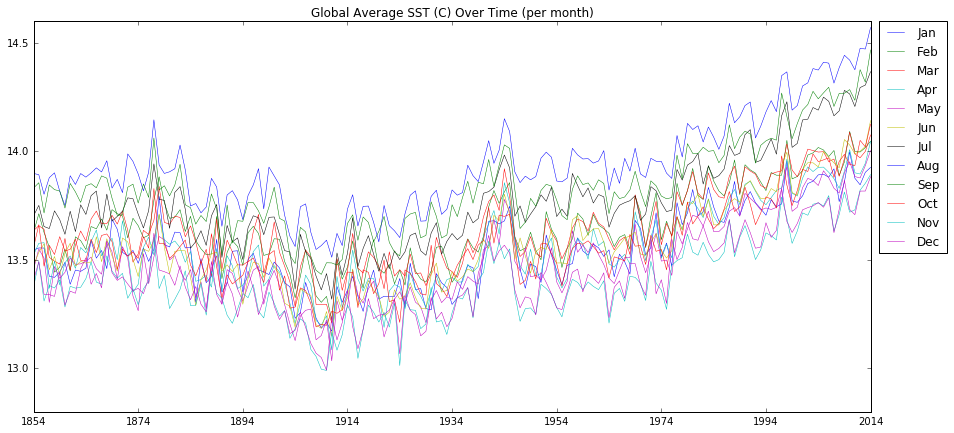

In [103]:
%matplotlib inline
import base64
import numpy as np
import matplotlib.pyplot as plt

def plot_global_range(arr, years):
    month_arr = np.nanmean( arr.reshape(len(years),12,89,180), axis=(2,3)).transpose()
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    fig = plt.figure()
    fig.set_size_inches(15,7)
    ax = fig.add_subplot(111)
    
    labels = xrange(years[0], years[-1]+1, 20)
    ax.set_xticklabels(labels)
    
    plt.plot(np.mean(month_arr, axis=0), 'r', lw=.5)
    plt.fill_between(range(len(years)), month_arr.min(axis=0), month_arr.max(axis=0), color="black", alpha=.05)
    plt.title('Global Average SST (C) Over Time (Average & Range)')
    plt.show()
    
ids, rows = zip(*data)

idx = 0
xlen = 180
ylen = 89

full_arr = np.empty((len(rows)*12, ylen, xlen))

for i, row in enumerate(rows):
    ascii = [map(int, r.split()) for r in base64.b64decode(row['data']['__data__']).split('\n')]  
    for p in xrange(0, len(ascii)-xlen, xlen):
        mon = np.array(ascii[ p:p + xlen ])
        full_arr[idx] = mon.transpose() / 100.0
        idx += 1
    
full_arr = np.ma.masked_array(full_arr, full_arr == -99.99)
years = years = [row['year'] for row in rows]
plot_monthly_means( full_arr, years )

In [ ]:
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy
from IPython.display import HTML, clear_output

def sst_to_gif(arr, nframes, fps=8, out_file='sst.gif', width=5, height=3):
    duration = nframes/fps

    fig, ax = plt.subplots(1,figsize=(width, height), facecolor='white')
    ax.axis('off')

    # render the first month
    img = ax.imshow(arr[0,:,:], cmap='jet')
    clear_output()

    indexes = list(np.arange(0, (len(rows)*12)/4, float(1)/fps))
    
    def make_frame(t):
        month_arr = arr[indexes.index(t),:,:]
        img.set_data(month_arr)
        return mplfig_to_npimage(fig)


    animation = mpy.VideoClip(make_frame, duration=duration)
    animation.write_gif(out_file, fps=fps)
    plt.show()
    clear_output()

gif_name='./sst1.gif'
sst_to_gif(full_arr, full_arr.shape[0]/12, out_file=gif_name)
HTML('<img width=700 src="'+gif_name+'">')